In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train_data = pd.read_csv('train.csv',header=0,sep=',')
test_data = pd.read_csv('test.csv',header=0, sep=',')
submission_file = pd.read_csv('gender_submission.csv', header=0, sep=',')

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_data.describe()
# There are missing values in Age column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.describe(include=['object'])
# there are two missing values in Embarked column

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


**Distribution of target variable**

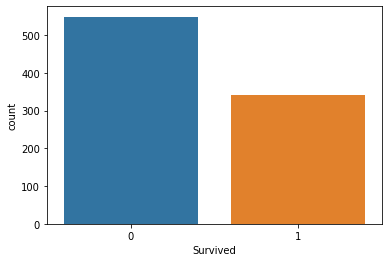

0    549
1    342
Name: Survived, dtype: int64
Percentage of people who survived: 38.38383838383838 %


In [8]:
# Plot Distribution
sns.countplot(x='Survived',data=train_data)
plt.show()

# What are the counts?
print(train_data.Survived.value_counts())

# What is the percentage?
count_yes = len(train_data[train_data.Survived == 1])
count_no = len(train_data[train_data.Survived != 1])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who survived:', percent_success, "%")

**Distribution of other variables**

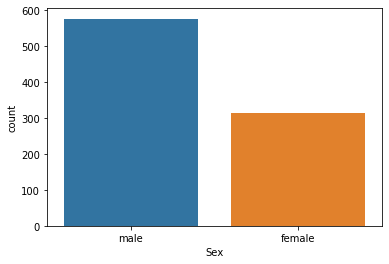

male      577
female    314
Name: Sex, dtype: int64


In [9]:
#Distribution of Sex
sns.countplot(x='Sex',data=train_data)
plt.show()

print(train_data.Sex.value_counts())

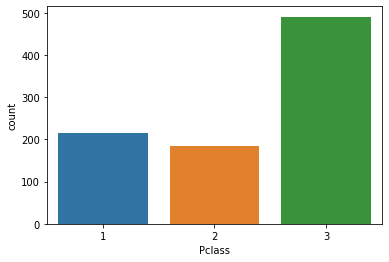

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [10]:
#Distribution of Pclass 1st = Upper, 2nd = Middle, 3rd = Lower
sns.countplot(x='Pclass',data=train_data)
plt.show()

print(train_data.Pclass.value_counts())

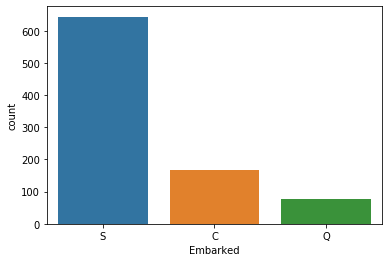

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [11]:
#Distribution of Embarked, C = Cherbourg, Q = Queenstown, S = Southampton
sns.countplot(x='Embarked',data=train_data)
plt.show()

print(train_data.Embarked.value_counts())

**Drawing trend towards the target variable**



In [12]:
train_data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [13]:
# Check distribution of age
#%matplotlib inline
#sns.distplot(train_data["Age"] )

In [14]:
train_data[train_data.Survived == 1].Pclass.value_counts()

print("Percentage of first class people survived = ", (136/216)*100, "%")
print("Percentage of second class people survived = ", (87/184)*100, "%")
print("Percentage of third class people survived = ", (119/491)*100, "%")


Percentage of first class people survived =  62.96296296296296 %
Percentage of second class people survived =  47.28260869565217 %
Percentage of third class people survived =  24.236252545824847 %


In [15]:
train_data[train_data.Survived == 1].Embarked.value_counts()

count_southampton_survived = train_data[train_data.Survived == 1].Embarked.value_counts().S
count_cherbourg_survived = train_data[train_data.Survived == 1].Embarked.value_counts().C
count_queenstown_survived = train_data[train_data.Survived == 1].Embarked.value_counts().Q

count_southampton = train_data.Embarked.value_counts().S
count_cherbourg = train_data.Embarked.value_counts().C
count_queenstown = train_data.Embarked.value_counts().Q

print("Percentage of people who embarked in Southampton survived = ", (count_southampton_survived/count_southampton)*100, "%")
print("Percentage of people who embarked in Cherbourg survived = ", (count_cherbourg_survived/count_cherbourg)*100, "%")
print("Percentage of people who embarked in Queenstown survived = ", (count_queenstown_survived/count_queenstown)*100, "%")

Percentage of people who embarked in Southampton survived =  33.69565217391305 %
Percentage of people who embarked in Cherbourg survived =  55.35714285714286 %
Percentage of people who embarked in Queenstown survived =  38.961038961038966 %


In [16]:
train_data[train_data.Survived == 1].Sex.value_counts()

count_male_survived = train_data[train_data.Survived == 1].Sex.value_counts().male
count_female_survived = train_data[train_data.Survived == 1].Sex.value_counts().female

count_male = train_data.Sex.value_counts().male
count_female = train_data.Sex.value_counts().female

print("Percentage of male survived = ", (count_male_survived/count_male)*100, "%")
print("Percentage of female survived = ", (count_female_survived/count_female)*100, "%")

Percentage of male survived =  18.890814558058924 %
Percentage of female survived =  74.20382165605095 %


In [17]:
train_data[train_data.Embarked == 'S'].Pclass.value_counts(normalize=True)

3    0.548137
2    0.254658
1    0.197205
Name: Pclass, dtype: float64

In [18]:
train_data[train_data.Embarked == 'C'].Pclass.value_counts(normalize=True)

1    0.505952
3    0.392857
2    0.101190
Name: Pclass, dtype: float64

In [19]:
train_data[train_data.Embarked == 'Q'].Pclass.value_counts(normalize=True)

3    0.935065
2    0.038961
1    0.025974
Name: Pclass, dtype: float64

**Feature engineering**

In [20]:
# Drop unnecessary variables

train_data.drop(columns= 'PassengerId', axis=1, inplace=True)
test_data.drop(columns = 'PassengerId', axis=1, inplace=True)

In [21]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
train_data.drop(columns= 'Ticket', axis=1, inplace=True)
test_data.drop(columns = 'Ticket', axis=1, inplace=True)

In [23]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [24]:
train_data.shape

(891, 10)

In [25]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [27]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [28]:
train_data.head(100)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,30.0708,NaN,C


In [29]:
for col in ['Pclass','Embarked', 'Sex']:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')


In [30]:
test_data.dtypes

Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked    category
dtype: object

In [31]:
# Handle missing values
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [32]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [33]:
# Drop Cabin variable since the data is missing for more than 60% observations
train_data.drop(columns= 'Cabin', axis=1, inplace=True)
test_data.drop(columns = 'Cabin', axis=1, inplace=True)

In [34]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [35]:
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1

In [36]:
train_data['IsAlone'] = 1
test_data['IsAlone'] = 1

In [37]:
train_data['IsAlone'].loc[train_data['Family_size'] > 1] = 0
test_data['IsAlone'].loc[test_data['Family_size'] > 1] = 0

C:\Users\91916\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
train_data['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [39]:
test_data['Family_size'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: Family_size, dtype: int64

In [40]:
train_data['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [41]:
test_data['IsAlone'].value_counts()

1    253
0    165
Name: IsAlone, dtype: int64

In [42]:
# name ='Braund, Mr. Owen Harris'
# name_spl = name.split()
# title = name_spl[1].split(".")
# print(title[0])

In [43]:
train_data['Title'] = train_data['Name'].str.split(", ", expand=True)[1].str.split(".",expand = True)[0]
test_data['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".",expand = True)[0]

In [44]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Jonkheer          1
Sir               1
Capt              1
Mme               1
Lady              1
Don               1
the Countess      1
Name: Title, dtype: int64

In [45]:
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [46]:
stat_min =10
title_names =(train_data['Title'].value_counts() < stat_min)
train_data['Title'] = train_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
train_data['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [47]:
stat_min =10
title_names =(test_data['Title'].value_counts() < stat_min)
test_data['Title'] = test_data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64

In [48]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr


In [49]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,0,Mrs


In [50]:
for col in ['Pclass','Embarked', 'Sex','Title']:
    train_data[col] = train_data[col].astype('category')
    test_data[col] = test_data[col].astype('category')

In [51]:
train_data.drop(columns= 'Name', axis=1, inplace=True)
test_data.drop(columns = 'Name', axis=1, inplace=True)

In [52]:
X_test = test_data

In [53]:
X_test.dtypes

Pclass         category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
Family_size       int64
IsAlone           int64
Title          category
dtype: object

**Split data into train and test**

In [54]:
y=train_data['Survived']
X=train_data.drop('Survived',axis=1)
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=0.20, random_state=345)

In [55]:
num_attr = X_train.select_dtypes(['int64','float64']).columns
num_attr_test = X_test.select_dtypes(['int64','float64']).columns

In [56]:
cat_attr = X_train.select_dtypes(['category']).columns
cat_attr_test = X_test.select_dtypes(['category']).columns

In [57]:
X_train.isnull().sum()

Pclass           0
Sex              0
Age            141
SibSp            0
Parch            0
Fare             0
Embarked         1
Family_size      0
IsAlone          0
Title            0
dtype: int64

In [58]:
X_validation.isnull().sum()

Pclass          0
Sex             0
Age            36
SibSp           0
Parch           0
Fare            0
Embarked        1
Family_size     0
IsAlone         0
Title           0
dtype: int64

In [59]:
X_test.isnull().sum()

Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Family_size     0
IsAlone         0
Title           0
dtype: int64

In [60]:
#Impute missing values with median
imputer = Imputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_validation[num_attr] = imputer.transform(X_validation[num_attr])
X_test[num_attr_test] = imputer.transform(X_test[num_attr_test])

C:\Users\91916\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\91916\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\91916\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [61]:
df_cat_train = X_train[cat_attr]
df_cat_validation = X_validation[cat_attr]
df_cat_test = X_test[cat_attr_test]

In [62]:
df_cat_train = df_cat_train.fillna(df_cat_train.mode().iloc[0])
df_cat_validation = df_cat_validation.fillna(df_cat_validation.mode().iloc[0])
df_cat_test = df_cat_test.fillna(df_cat_test.mode().iloc[0])

In [63]:
X_train[cat_attr] = df_cat_train
X_validation[cat_attr] = df_cat_validation
X_test[cat_attr_test] = df_cat_test

C:\Users\91916\Anaconda3\lib\site-packages\pandas\core\frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(712, 10)
(712,)
(179, 10)
(179,)


In [65]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
396,3,female,31.0,0.0,0.0,7.8542,S,1.0,1.0,Miss
41,2,female,27.0,1.0,0.0,21.0000,S,2.0,0.0,Mrs
324,3,male,28.0,8.0,2.0,69.5500,S,11.0,0.0,Mr
410,3,male,28.0,0.0,0.0,7.8958,S,1.0,1.0,Mr
855,3,female,18.0,0.0,1.0,9.3500,S,2.0,0.0,Mrs


In [66]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,IsAlone,Title
0,3,male,34.5,0.0,0.0,7.8292,Q,1.0,1.0,Mr
1,3,female,47.0,1.0,0.0,7.0000,S,2.0,0.0,Mrs
2,2,male,62.0,0.0,0.0,9.6875,Q,1.0,1.0,Mr
3,3,male,27.0,0.0,0.0,8.6625,S,1.0,1.0,Mr
4,3,female,22.0,1.0,1.0,12.2875,S,3.0,0.0,Mrs


In [67]:
# Dummify the categorical columns
X_train = pd.get_dummies(X_train, columns=cat_attr,drop_first=True)
X_validation = pd.get_dummies(X_validation, columns=cat_attr,drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_attr_test,drop_first=True)

In [68]:
# #Standardize the data (numerical attributes only)
# scaler = StandardScaler()
# scaler.fit(X_train[num_attr])

In [69]:
# X_train[num_attr] = scaler.transform(X_train[num_attr])
# X_validation[num_attr] = scaler.transform(X_validation[num_attr])
# X_test[num_attr_test] = scaler.transform(X_test[num_attr_test])

In [70]:
X_train.head()

,Age,SibSp,Parch,Fare,Family_size,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
396,31.0,0.0,0.0,7.8542,1.0,1.0,0,1,0,0,1,0,1,0,0
41,27.0,1.0,0.0,21.0000,2.0,0.0,1,0,0,0,1,0,0,0,1
324,28.0,8.0,2.0,69.5500,11.0,0.0,0,1,1,0,1,0,0,1,0
410,28.0,0.0,0.0,7.8958,1.0,1.0,0,1,1,0,1,0,0,1,0
855,18.0,0.0,1.0,9.3500,2.0,0.0,0,1,0,0,1,0,0,0,1


In [71]:
X_test.head()

,Age,SibSp,Parch,Fare,Family_size,IsAlone,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,34.5,0.0,0.0,7.8292,1.0,1.0,0,1,1,1,0,0,0,1,0
1,47.0,1.0,0.0,7.0000,2.0,0.0,0,1,0,0,1,0,0,0,1
2,62.0,0.0,0.0,9.6875,1.0,1.0,1,0,1,1,0,0,0,1,0
3,27.0,0.0,0.0,8.6625,1.0,1.0,0,1,1,0,1,0,0,1,0
4,22.0,1.0,1.0,12.2875,3.0,0.0,0,1,0,0,1,0,0,0,1


In [72]:
X_test.shape

(418, 15)

**Build a Random Forest Classifier**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
clf = RandomForestClassifier(n_estimators=10,max_depth=8)
clf.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

y_pred = clf.predict(X_train)
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred))

y_pred_validation = clf.predict(X_validation)
print("Accuracy for Validation set:")
print(accuracy_score(y_validation,y_pred_validation))

print("\n")

print("Recall for Train set:")
print(recall_score(y_train,y_pred,pos_label=1))

print("Recall for Validation set:")
print(recall_score(y_validation,y_pred_validation,pos_label=1))

print("\n")

print("Precision for Train set:")
print(precision_score(y_train,y_pred,pos_label=1))

print("Precision for Validation set:")
print(precision_score(y_validation,y_pred_validation,pos_label=1))


Accuracy for Train set:
0.9002808988764045
Accuracy for Validation set:
0.7988826815642458


Recall for Train set:
0.7900355871886121
Recall for Validation set:
0.7377049180327869


Precision for Train set:
0.9487179487179487
Precision for Validation set:
0.6923076923076923


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}

scores = ['precision', 'recall']

In [77]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print("\n")

    clf = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print("\n")
    print(clf.best_params_)
    print("\n")
    
    print("Grid scores on training set:")
    print("\n")
    means = clf.cv_results_['mean_test_score']
    for mean, params in zip(means, clf.cv_results_['params']):
        print("%0.3f for %r"
              % (mean, params))

# Tuning hyper-parameters for precision


Best parameters set found on training set:


{'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 9}


Grid scores on training set:


0.798 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 9}
0.790 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 18}
0.813 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 27}
0.814 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 36}
0.801 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 45}
0.798 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 54}
0.792 for {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 63}
0.808 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 9}
0.800 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 18}
0.796 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 27}
0.802 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 36}
0.807 for {'max_depth': 2, 'min_samples_leaf': 4, 'n_

In [78]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
CV_rfc.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [79]:
print(CV_rfc.best_score_, CV_rfc.best_params_)

0.8370786516853933 {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 27}


In [80]:
predicted_result =CV_rfc.predict(X_test)

In [81]:
predicted_result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [82]:
submission_file['Survived']= predicted_result

In [83]:
submission_file.head(20)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [84]:
submission_file.to_csv('titanic_submission_file_1.csv',index=False)